In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('SalaryTrainingData.csv')
df.head()

,Age,workclass,education,education-num,Race,Gender,Salary Bracket
0,39,State-gov,Bachelors,13,White,Male,<=50K
1,50,Self-emp-not-inc,Bachelors,13,White,Male,<=50K
2,38,Private,HS-grad,9,White,Male,<=50K
3,53,Private,11th,7,Black,Male,<=50K
4,28,Private,Bachelors,13,Black,Female,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
Age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
Race              32561 non-null object
Gender            32561 non-null object
Salary Bracket    32561 non-null object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [4]:
# target variable
df['Salary Bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
df['Salary Bracket'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary Bracket, dtype: int64

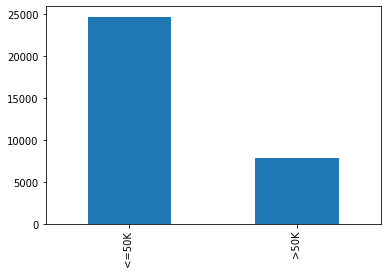

In [6]:
df['Salary Bracket'].value_counts().plot.bar()
plt.show()

### Independent variables

In [7]:
df.describe()

,Age,education-num
count,32561.000000,32561.000000
mean,38.581647,10.080679
std,13.640433,2.572720
min,17.000000,1.000000
25%,28.000000,9.000000
50%,37.000000,10.000000
75%,48.000000,12.000000
max,90.000000,16.000000


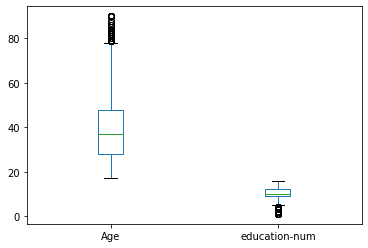

In [8]:
df.plot.box()
plt.show()

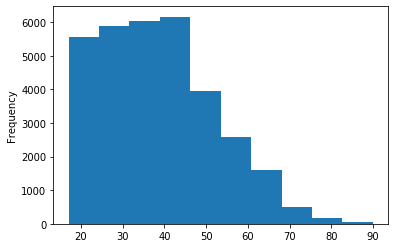

In [9]:
df.Age.plot(kind='hist')
plt.show()

In [10]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
# replace ' ?' by 'Unknown'
df.workclass.replace({' ?':'Unknown'},inplace=True)

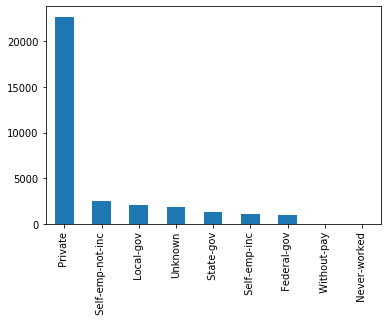

In [13]:
df.workclass.value_counts().plot.bar()
plt.show()

In [14]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [15]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

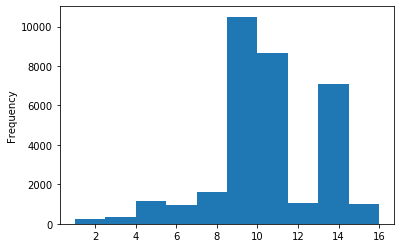

In [16]:
df['education-num'].plot.hist()
plt.show()

In [17]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

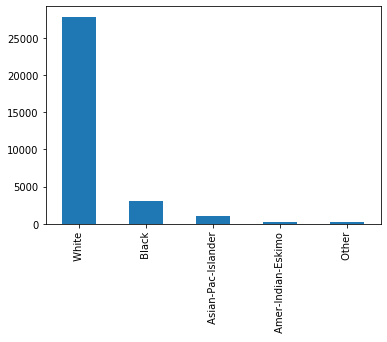

In [18]:
df.Race.value_counts().plot.bar()
plt.show()

In [19]:
df.Gender.unique()

array([' Male', ' Female'], dtype=object)

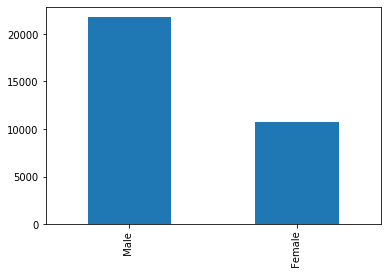

In [20]:
df.Gender.value_counts().plot.bar()
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
Age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
Race              32561 non-null object
Gender            32561 non-null object
Salary Bracket    32561 non-null object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [22]:
# convert all categorical variables into dummy variables
df = pd.get_dummies(df,columns=['workclass','education','Race','Gender'])
df.head()

,Age,education-num,Salary Bracket,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,education_ Preschool,education_ Prof-school,education_ Some-college,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Gender_ Female,Gender_ Male
0,39,13,<=50K,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,50,13,<=50K,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,<=50K,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,<=50K,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,<=50K,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 35 columns):
Age                            32561 non-null int64
education-num                  32561 non-null int64
Salary Bracket                 32561 non-null object
workclass_ Federal-gov         32561 non-null uint8
workclass_ Local-gov           32561 non-null uint8
workclass_ Never-worked        32561 non-null uint8
workclass_ Private             32561 non-null uint8
workclass_ Self-emp-inc        32561 non-null uint8
workclass_ Self-emp-not-inc    32561 non-null uint8
workclass_ State-gov           32561 non-null uint8
workclass_ Without-pay         32561 non-null uint8
workclass_Unknown              32561 non-null uint8
education_ 10th                32561 non-null uint8
education_ 11th                32561 non-null uint8
education_ 12th                32561 non-null uint8
education_ 1st-4th             32561 non-null uint8
education_ 5th-6th             32561 non-null uint8
educat

### Split data

In [24]:
# target  is Salary Bracket
y = df['Salary Bracket'].astype('category')
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary Bracket, dtype: category
Categories (2, object): [<=50K, >50K]

In [25]:
x = df.drop(columns='Salary Bracket')

In [26]:
x.head()

,Age,education-num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,education_ Preschool,education_ Prof-school,education_ Some-college,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Gender_ Female,Gender_ Male
0,39,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
# split data
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 9)

In [29]:
x_train.shape, x_test.shape

((22792, 34), (9769, 34))

In [30]:
y_train.shape, y_test.shape

((22792,), (9769,))

### Try to run with Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(random_state=9)

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [34]:
y_pre = rf.predict(x_test)

In [35]:
y_pre

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype=object)

In [36]:
# accuracy metrics
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

       <=50K       0.84      0.89      0.86      7448
        >50K       0.56      0.45      0.50      2321

    accuracy                           0.78      9769
   macro avg       0.70      0.67      0.68      9769
weighted avg       0.77      0.78      0.78      9769



In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
confusion_matrix(y_test,y_pre)

array([[6620,  828],
       [1274, 1047]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pre)

0.7848295629030607

### Hyperparameters for Random forest model

In [41]:
# parameters of RF
params = {'n_estimators':[50,100,200],          
          'max_features':['auto','sqrt','log2'],          
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'criterion': ['gini','entropy']}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
base_model = RandomForestClassifier(random_state=9)

In [44]:
rf_model = GridSearchCV(base_model,params, 'accuracy',cv=5)

In [45]:
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=9,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [47]:
rf_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [48]:
accuracy_score(y_test,rf_model.best_estimator_.predict(x_test))

0.8054048520831201

In [49]:
confusion_matrix(y_test,rf_model.best_estimator_.predict(x_test))

array([[6915,  533],
       [1368,  953]], dtype=int64)

In [50]:
print(classification_report(y_test,rf_model.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      7448
        >50K       0.64      0.41      0.50      2321

    accuracy                           0.81      9769
   macro avg       0.74      0.67      0.69      9769
weighted avg       0.79      0.81      0.79      9769



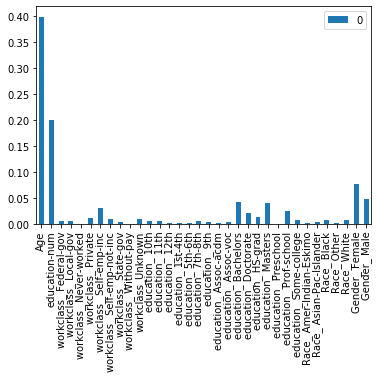

In [53]:
# feature importance
pd.DataFrame(data=rf_model.best_estimator_.feature_importances_, index=x.columns.transpose()).plot.bar()
plt.show()